# Assigment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Bogotá, Bogota D.C., Colombia**, or **Colombia** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Bogotá, Bogota D.C., Colombia** to Ann Arbor, USA. In that case at least one source file must be about **Bogotá, Bogota D.C., Colombia**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Bogotá, Bogota D.C., Colombia** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./Datasets/Assignment4_example.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Extracting Data

We are going to handle temperature data from Bogotá D.C., Colombia, which gather records from first of January 1981 to 31 Decembre 2021. This data have been obtained from NASA's weather service [POWER | Data Access Viewer](https://power.larc.nasa.gov/data-access-viewer/).

In [2]:
# let's bring in the dataframe and skip the header lines
df = pd.read_csv('./Datasets/Bogota_Colombia.csv', skiprows=18)
df.head()

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR
0,1981,1,1,17.21,14.86,16.04,17.40,7.29,21.09,13.80,13.00,87.56,1.57
1,1981,1,2,17.61,14.06,15.83,17.70,9.16,22.70,13.55,12.33,81.94,1.46
2,1981,1,3,18.02,12.19,15.11,17.99,12.11,24.50,12.39,10.93,72.06,0.25
3,1981,1,4,18.13,11.91,15.02,17.94,11.48,24.49,13.01,10.74,70.19,0.11
4,1981,1,5,17.63,13.82,15.73,18.06,11.95,23.79,11.84,12.21,80.50,0.12


In [3]:
df.tail()

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR
14970,2021,12,27,19.02,15.73,17.37,19.57,6.77,23.24,16.47,13.73,83.06,6.58
14971,2021,12,28,19.58,15.26,17.42,20.08,9.19,25.01,15.82,13.37,78.94,7.19
14972,2021,12,29,19.68,14.94,17.31,20.12,9.77,25.33,15.57,13.06,76.81,5.45
14973,2021,12,30,19.59,14.72,17.15,19.95,8.45,24.73,16.29,12.88,76.31,1.76
14974,2021,12,31,20.29,14.83,17.55,20.94,10.01,26.26,16.26,12.94,73.44,1.23


According to file each column contains information about:

**T2M**:             Temperature at 2 Meters (C°)

**T2MDEW**:           Dew/Frost Point at 2 Meters (C°) 

**T2MWET**:           Wet Bulb Temperature at 2 Meters (C°) 

**TS**:               Earth Skin Temperature (C°) 

**T2M_RANGE**:        Temperature at 2 Meters Range (C°) 

**T2M_MAX**:          Temperature at 2 Meters Maximum (C°) 

**T2M_MIN**:          Temperature at 2 Meters Minimum (C°) 

**QV2M**:             Specific Humidity at 2 Meters (g/kg) 

**RH2M**:             Relative Humidity at 2 Meters (%) 

**PRECTOTCORR**:      Precipitation Corrected (mm/day)

In [4]:
# first we check if there're missing values
print(df.shape)
df.isna().sum()

(14975, 13)


YEAR           0
MO             0
DY             0
T2M            0
T2MDEW         0
T2MWET         0
TS             0
T2M_RANGE      0
T2M_MAX        0
T2M_MIN        0
QV2M           0
RH2M           0
PRECTOTCORR    0
dtype: int64

In [5]:
df.columns

Index(['YEAR', 'MO', 'DY', 'T2M', 'T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE',
       'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M', 'PRECTOTCORR'],
      dtype='object')

In [6]:
# delete 29th Febrary from each leap year (in this case there're 10 leap years)
df = df[(df['MO'] != 2) | (df['DY'] != 29)]
df.head()

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR
0,1981,1,1,17.21,14.86,16.04,17.40,7.29,21.09,13.80,13.00,87.56,1.57
1,1981,1,2,17.61,14.06,15.83,17.70,9.16,22.70,13.55,12.33,81.94,1.46
2,1981,1,3,18.02,12.19,15.11,17.99,12.11,24.50,12.39,10.93,72.06,0.25
3,1981,1,4,18.13,11.91,15.02,17.94,11.48,24.49,13.01,10.74,70.19,0.11
4,1981,1,5,17.63,13.82,15.73,18.06,11.95,23.79,11.84,12.21,80.50,0.12


In [7]:
# now we create 4 variable for each decade
d80 = df[(1981 <= df['YEAR']) & (df['YEAR'] < 1990)]
d90 = df[(1990 <= df['YEAR']) & (df['YEAR'] < 2000)]
d00 = df[(2000 <= df['YEAR']) & (df['YEAR'] < 2010)]
d10 = df[(2010 <= df['YEAR']) & (df['YEAR'] < 2020)]
dec = [d80, d90, d00, d10]
ii = 1980
for d in dec:
    d.rename(columns={'T2M_MAX': 'T2M_MAX_{}'.format(ii), 'T2M_MIN': 'T2M_MIN_{}'.format(ii), 'PRECTOTCORR': 'PRECTOTCORR_{}'.format(ii)}, inplace=True)
    ii += 10
d10.head()

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX_2010,T2M_MIN_2010,QV2M,RH2M,PRECTOTCORR_2010
10592,2010,1,1,18.78,8.07,13.43,19.18,14.59,26.90,12.31,8.30,54.62,0.0
10593,2010,1,2,18.80,7.75,13.28,19.28,15.48,27.57,12.08,8.12,52.69,0.0
10594,2010,1,3,17.93,5.49,11.71,18.44,17.88,27.47,9.58,6.96,48.19,0.0
10595,2010,1,4,18.88,6.63,12.76,19.32,17.44,27.99,10.55,7.57,48.12,0.0
10596,2010,1,5,20.31,9.46,14.89,20.84,15.34,27.99,12.64,9.16,52.38,0.0


In [8]:
from functools import reduce

# and we group by according to the day of year
maxx, minn = [], []
ii = 1980
for d in dec:
    maxx.append(d[['MO', 'DY', 'T2M_MAX_{}'.format(ii)]].groupby(['MO', 'DY']).max())
    minn.append(d[['MO', 'DY', 'T2M_MIN_{}'.format(ii)]].groupby(['MO', 'DY']).min())
    ii += 10
maxx[0].head()

T2M_MAX_1980
MO DY              
1  1          25.08
   2          24.76
   3          24.91
   4          25.27
   5          24.82

In [9]:
for ii in range(len(maxx)):
    maxx[ii].reset_index(inplace=True)
    minn[ii].reset_index(inplace=True)

for ii in range(len(maxx)):
    maxx[ii]['DY'] = np.arange(1, 366, 1)
    minn[ii]['DY'] = np.arange(1, 366, 1)
minn[0]

,MO,DY,T2M_MIN_1980
0,1,1,13.62
1,1,2,11.32
2,1,3,12.30
3,1,4,12.76
4,1,5,11.84
...,...,...,...
360,12,361,12.32
361,12,362,13.07
362,12,363,11.99
363,12,364,9.65


In [10]:
# and we gather all records into one dataframe
T_M = reduce(lambda  left,right: pd.merge(left,right,on=['MO','DY'], how='outer'), maxx).fillna('none')
T_m = reduce(lambda  left,right: pd.merge(left,right,on=['MO','DY'], how='outer'), minn).fillna('none')
T_Mm = pd.merge(T_m, T_M, on=['MO','DY'], how='outer')
T_Mm

,MO,DY,T2M_MIN_1980,T2M_MIN_1990,T2M_MIN_2000,T2M_MIN_2010,T2M_MAX_1980,T2M_MAX_1990,T2M_MAX_2000,T2M_MAX_2010
0,1,1,13.62,12.48,12.26,12.31,25.08,24.90,26.76,27.66
1,1,2,11.32,12.87,12.63,10.74,24.76,24.96,27.65,27.57
2,1,3,12.30,13.02,11.98,9.58,24.91,25.44,27.52,27.47
3,1,4,12.76,12.18,13.10,10.55,25.27,26.30,26.73,27.99
4,1,5,11.84,12.69,12.33,11.72,24.82,26.33,26.69,27.99
...,...,...,...,...,...,...,...,...,...,...
360,12,361,12.32,12.08,12.63,12.02,23.85,25.69,24.83,28.73
361,12,362,13.07,12.07,13.10,12.76,24.33,26.01,26.51,27.81
362,12,363,11.99,12.87,12.69,11.43,24.03,26.30,27.31,28.34
363,12,364,9.65,10.82,13.03,12.68,24.88,24.37,26.80,28.76


In [11]:
T_m.head()

,MO,DY,T2M_MIN_1980,T2M_MIN_1990,T2M_MIN_2000,T2M_MIN_2010
0,1,1,13.62,12.48,12.26,12.31
1,1,2,11.32,12.87,12.63,10.74
2,1,3,12.30,13.02,11.98,9.58
3,1,4,12.76,12.18,13.10,10.55
4,1,5,11.84,12.69,12.33,11.72


In [12]:
T_M.head()

,MO,DY,T2M_MAX_1980,T2M_MAX_1990,T2M_MAX_2000,T2M_MAX_2010
0,1,1,25.08,24.90,26.76,27.66
1,1,2,24.76,24.96,27.65,27.57
2,1,3,24.91,25.44,27.52,27.47
3,1,4,25.27,26.30,26.73,27.99
4,1,5,24.82,26.33,26.69,27.99


In [13]:
print(T_M.columns)
print(T_m.columns)

Index(['MO', 'DY', 'T2M_MAX_1980', 'T2M_MAX_1990', 'T2M_MAX_2000',
       'T2M_MAX_2010'],
      dtype='object')
Index(['MO', 'DY', 'T2M_MIN_1980', 'T2M_MIN_1990', 'T2M_MIN_2000',
       'T2M_MIN_2010'],
      dtype='object')


In [14]:
T_M.drop(['MO'], axis=1, inplace=True)
T_m.drop(['MO'], axis=1, inplace=True)

In [15]:
T_M.set_index('DY', inplace=True)
T_m.set_index('DY', inplace=True)

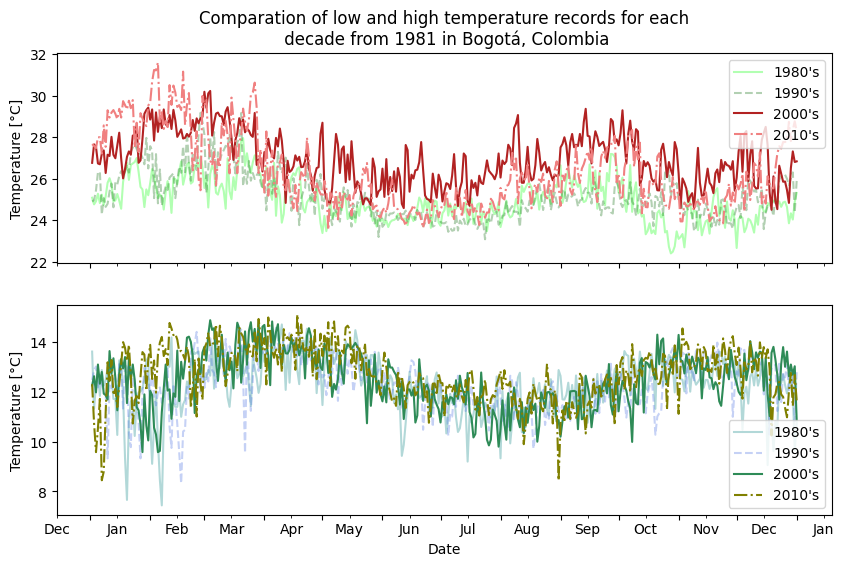

In [16]:
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

#finally, we can plot 
fig, ((ax1), (ax2)) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

alphas = [0.3, 0.3, 1, 1]
colors1 = ['lime', 'darkgreen', 'firebrick', 'lightcoral']
colors2 = ['teal', 'royalblue', 'seagreen', 'olive']
lines = ['solid', 'dashed', 'solid', 'dashdot']

year = 1980
for ii, c in enumerate(T_M.columns):
    ax1.plot(T_M.index, T_M[c], label="{}'s".format(year), color = colors1[ii], linestyle = lines[ii], alpha=alphas[ii])
    year += 10
    ax1.set_ylabel('Temperature [°C]')
    ax1.set_title('Comparation of low and high temperature records for each\n decade from 1981 in Bogotá, Colombia')
ax1.legend(loc='upper right')
year = 1980
for ii, c in enumerate(T_m.columns):
    ax2.plot(T_m.index, T_m[c], label="{}'s".format(year), color = colors2[ii], linestyle = lines[ii], alpha=alphas[ii])
    year += 10
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Temperature [°C]')
ax2.legend(loc='lower right')

# here we remove default x-axis and replace by the months
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
plt.show()

## Summarizing

We gather all this in one fuction that makes the plots for any city

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

from functools import reduce
import warnings
warnings.filterwarnings('ignore')

def temperature_plot(city):
    df = pd.read_csv('./Datasets/'+city+'.csv', skiprows=18)
    
    # delete 29th Febrary from each leap year (in this case there're 10 leap years)
    df = df[(df['MO'] != 2) | (df['DY'] != 29)]
    
    d80 = df[(1981 <= df['YEAR']) & (df['YEAR'] < 1990)]
    d90 = df[(1990 <= df['YEAR']) & (df['YEAR'] < 2000)]
    d00 = df[(2000 <= df['YEAR']) & (df['YEAR'] < 2010)]
    d10 = df[(2010 <= df['YEAR']) & (df['YEAR'] < 2020)]
    dec = [d80, d90, d00, d10]
    ii = 1980
    for d in dec:
        d.rename(columns={'T2M_MAX': 'T2M_MAX_{}'.format(ii), 'T2M_MIN': 'T2M_MIN_{}'.format(ii), 'PRECTOTCORR': 'PRECTOTCORR_{}'.format(ii)}, inplace=True)
        ii += 10
        
    maxx, minn = [], []
    ii = 1980
    for d in dec:
        maxx.append(d[['MO', 'DY', 'T2M_MAX_{}'.format(ii)]].groupby(['MO', 'DY']).max())
        minn.append(d[['MO', 'DY', 'T2M_MIN_{}'.format(ii)]].groupby(['MO', 'DY']).min())
        ii += 10
        
    for ii in range(len(maxx)):
        maxx[ii].reset_index(inplace=True)
        minn[ii].reset_index(inplace=True)
        maxx[ii]['DY'] = np.arange(1, 366, 1)
        minn[ii]['DY'] = np.arange(1, 366, 1)
        
    T_M = reduce(lambda  left,right: pd.merge(left,right,on=['MO','DY'], how='outer'), maxx).fillna('none')
    T_m = reduce(lambda  left,right: pd.merge(left,right,on=['MO','DY'], how='outer'), minn).fillna('none')
    T_Mm = pd.merge(T_m, T_M, on=['MO','DY'], how='outer')
    
    T_M.drop(['MO'], axis=1, inplace=True)
    T_m.drop(['MO'], axis=1, inplace=True)
    
    T_M.set_index('DY', inplace=True)
    T_m.set_index('DY', inplace=True)
    
    fig, ((ax1), (ax2)) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

    alphas = [0.3, 0.3, 1, 1]
    colors1 = ['lime', 'darkgreen', 'firebrick', 'lightcoral']
    colors2 = ['teal', 'royalblue', 'seagreen', 'olive']
    lines = ['solid', 'dashed', 'solid', 'dashdot']

    year = 1980
    for ii, c in enumerate(T_M.columns):
        ax1.plot(T_M.index, T_M[c], label="{}'s".format(year), color = colors1[ii], linestyle = lines[ii], alpha=alphas[ii])
        year += 10
        ax1.set_ylabel('Temperature [°C]')
        ax1.set_title('Comparation of low and high temperature records for each\n decade from 1981 in {}'.format(city))
    ax1.legend(loc='upper right')
    year = 1980
    for ii, c in enumerate(T_m.columns):
        ax2.plot(T_m.index, T_m[c], label="{}'s".format(year), color = colors2[ii], linestyle = lines[ii], alpha=alphas[ii])
        year += 10
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Temperature [°C]')
    ax2.legend(loc='lower right')

    # here we remove default x-axis and replace by the months
    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_minor_formatter(DateFormatter('%b'))
    plt.savefig('{}.jpg'.format(city))
    plt.show()

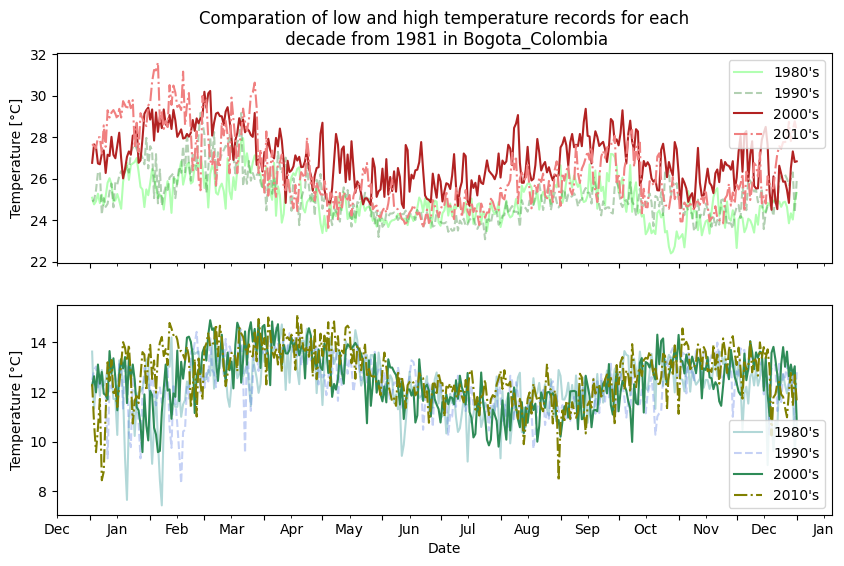

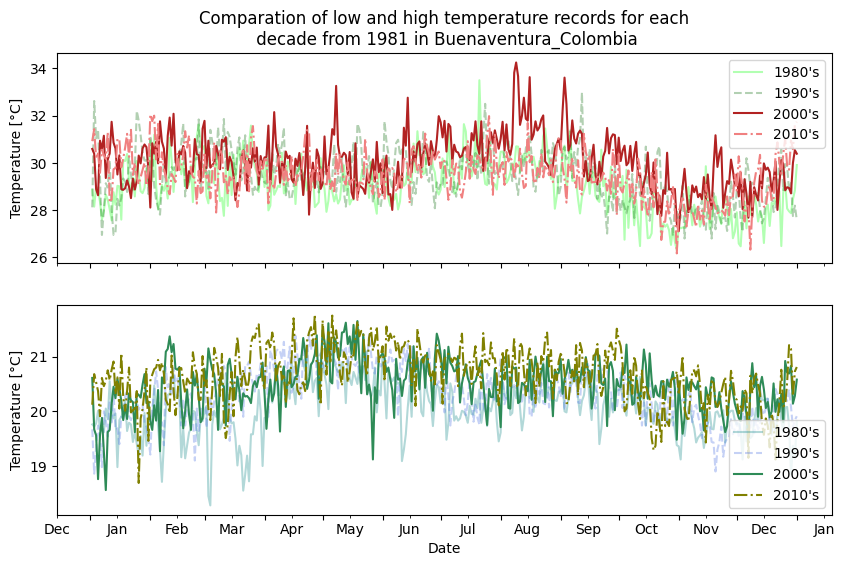

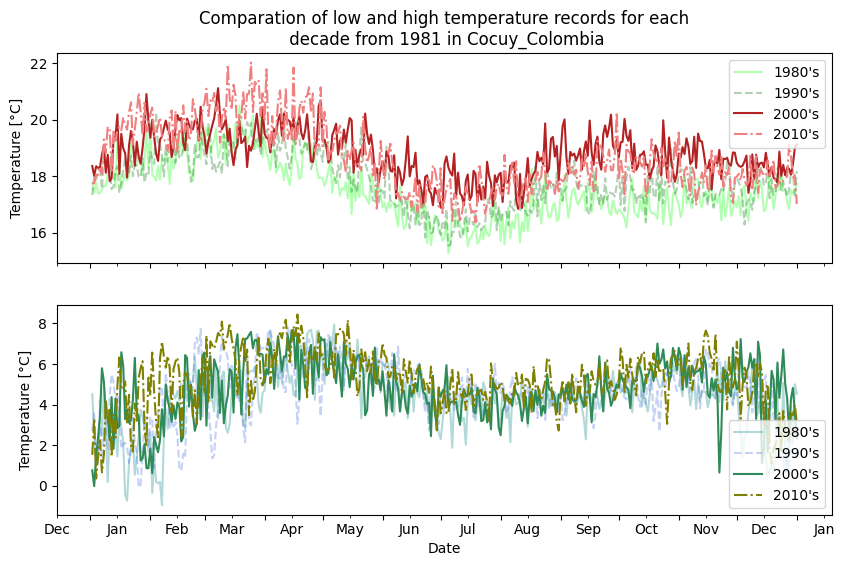

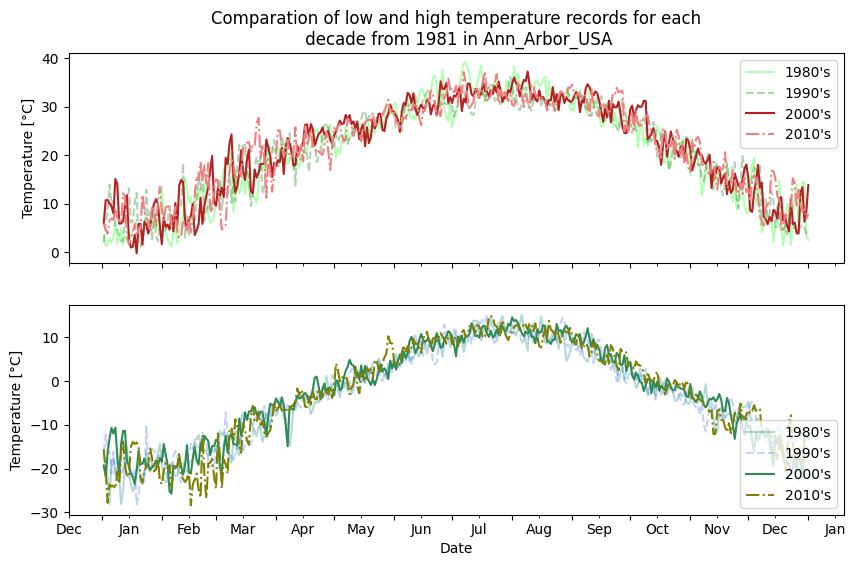

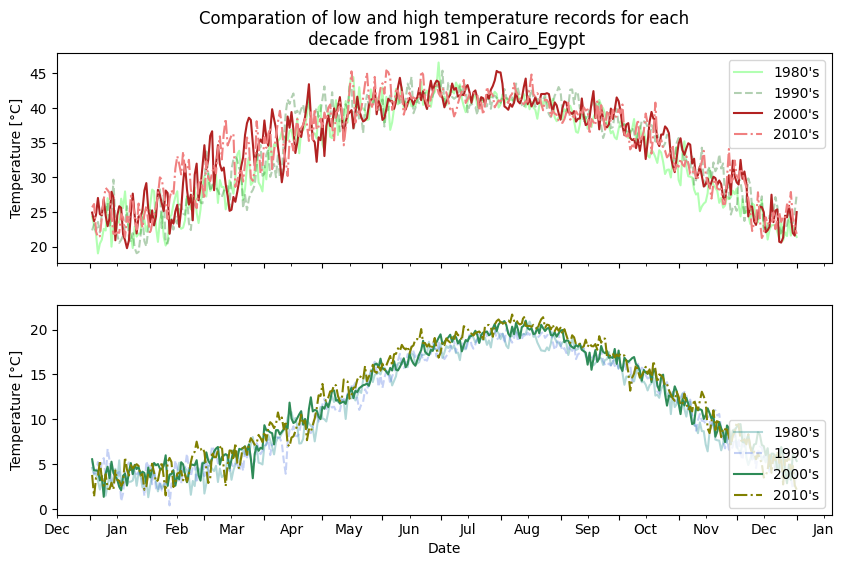

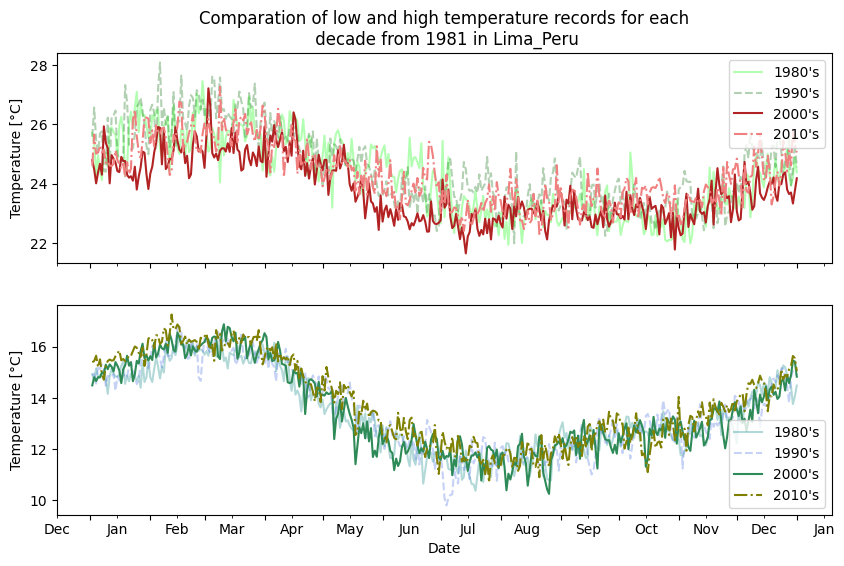

In [18]:
city = ['Bogota_Colombia', 'Buenaventura_Colombia', 'Cocuy_Colombia', 'Ann_Arbor_USA', 'Cairo_Egypt', 'Lima_Peru']
for c in city:
    temperature_plot(c)